In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Train_loan_data.csv')


In [3]:
df.isnull().sum()

Unnamed: 0                          0
LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        1
BorrowerAddress                     2
BorrowerCity                        2
BorrowerState                       3
BorrowerZip                         3
LoanStatusDate                  30128
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  16
FranchiseName                  314659
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator

In [4]:
df[['ForgivenessDate', 'LoanStatusDate']] = df[['ForgivenessDate', 'LoanStatusDate']].fillna(method='ffill')
df.head()

C:\Users\mehul\AppData\Local\Temp\ipykernel_13144\2912981909.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['ForgivenessDate', 'LoanStatusDate']] = df[['ForgivenessDate', 'LoanStatusDate']].fillna(method='ffill')


,Unnamed: 0,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,157518,2432367109,04/10/2020,455,PPP,PROFESSIONAL FLOORING CONTRACTORS LLC,3681 NW 124th Ave,CORAL SPRINGS,FL,33065-2409,...,Limited Liability Company(LLC),464999,"BankUnited, National Association",MIAMI LAKES,FL,Unanswered,Unanswered,NaN,253240.59,01/26/2021
1,96154,7685157302,04/30/2020,883,PPP,CULP CONSTRUCTION COMPANY,2320 S Main St,Salt Lake City,UT,84115,...,Corporation,121536,Customers Bank,PHOENIXVILLE,PA,Unanswered,Unanswered,NaN,436587.98,01/11/2021
2,79931,9328407001,04/09/2020,914,PPP,KELLY WEARSTLER LLLP,760 N La Cienega Blvd,WEST HOLLYWOOD,CA,90069-5204,...,Partnership,119918,East West Bank,PASADENA,CA,Female Owned,Non-Veteran,NaN,375128.61,08/26/2021
3,120564,2802897200,04/16/2020,610,PPP,"RED RIVER LOGISTICS, LLC",200 S MAIN ST,KELLER,TX,76248,...,Corporation,48270,"JPMorgan Chase Bank, National Association",COLUMBUS,OH,Male Owned,Non-Veteran,NaN,256856.27,11/12/2020
4,181707,8972487010,04/09/2020,515,PPP,GULL LAKE COUNTRY CLUB,9725 West Gull Lake Dr,RICHLAND,MI,49083-9541,...,Corporation,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,335600.14,02/03/2021


In [5]:
df.dropna(subset=['ProjectCity','BorrowerName','BorrowerAddress','BorrowerCity','BorrowerState','BorrowerZip','UndisbursedAmount','ProjectCountyName','ProjectZip','CD','JobsReported','BusinessType','NAICSCode','PAYROLL_PROCEED'], inplace=True)
df

,Unnamed: 0,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,157518,2432367109,04/10/2020,455,PPP,PROFESSIONAL FLOORING CONTRACTORS LLC,3681 NW 124th Ave,CORAL SPRINGS,FL,33065-2409,...,Limited Liability Company(LLC),464999,"BankUnited, National Association",MIAMI LAKES,FL,Unanswered,Unanswered,NaN,253240.59,01/26/2021
1,96154,7685157302,04/30/2020,883,PPP,CULP CONSTRUCTION COMPANY,2320 S Main St,Salt Lake City,UT,84115,...,Corporation,121536,Customers Bank,PHOENIXVILLE,PA,Unanswered,Unanswered,NaN,436587.98,01/11/2021
2,79931,9328407001,04/09/2020,914,PPP,KELLY WEARSTLER LLLP,760 N La Cienega Blvd,WEST HOLLYWOOD,CA,90069-5204,...,Partnership,119918,East West Bank,PASADENA,CA,Female Owned,Non-Veteran,NaN,375128.61,08/26/2021
3,120564,2802897200,04/16/2020,610,PPP,"RED RIVER LOGISTICS, LLC",200 S MAIN ST,KELLER,TX,76248,...,Corporation,48270,"JPMorgan Chase Bank, National Association",COLUMBUS,OH,Male Owned,Non-Veteran,NaN,256856.27,11/12/2020
4,181707,8972487010,04/09/2020,515,PPP,GULL LAKE COUNTRY CLUB,9725 West Gull Lake Dr,RICHLAND,MI,49083-9541,...,Corporation,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,335600.14,02/03/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326267,259178,4486017005,04/03/2020,669,PPP,FOCUS INC.,504 FLINT ST,JONESBORO,AR,72401-3424,...,Non-Profit Organization,79133,Southern Bank,POPLAR BLUFF,MO,Unanswered,Unanswered,Y,1283542.86,02/09/2021
326268,365838,8016497307,05/01/2020,507,PPP,ABRAHAMSON VORACHEK & RDZANEK (VICKI LAFER ABR...,"120 N. LaSalle Street, suite 1050",chicago,IL,60602,...,Sole Proprietorship,113190,American Express National Bank,Sandy,UT,Unanswered,Unanswered,NaN,179779.81,05/21/2021
326269,131932,4663397005,04/04/2020,885,PPP,"ALAMON, INC.",315 West Idaho Street,KALISPELL,MT,59901-3942,...,Employee Stock Ownership Plan(ESOP),41946,Three Rivers Bank of Montana,KALISPELL,MT,Unanswered,Non-Veteran,NaN,2866445.73,06/11/2021
326270,146867,3576568306,01/22/2021,353,PPS,MCCALLUM SAUBER FLORISTS INC.,5001 Forbes Boulevard Suites A & B,Lanham,MD,20706,...,Subchapter S Corporation,440839,John Marshall Bank,RESTON,VA,Unanswered,Unanswered,NaN,175376.96,01/26/2022


In [6]:
df.drop(columns=['BorrowerAddress','BorrowerCity','BorrowerState','BorrowerZip','ProjectCity','ProjectCountyName','ProjectZip','Race','Ethnicity','OriginatingLenderCity','ServicingLenderCity','ServicingLenderAddress','FranchiseName','NonProfit','Unnamed','ServicingLenderZip','CD','ServicingLenderZip'],inplace= True, errors='ignore')
df.head()

,Unnamed: 0,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,...,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderState,Gender,Veteran,ForgivenessAmount,ForgivenessDate
0,157518,2432367109,04/10/2020,455,PPP,PROFESSIONAL FLOORING CONTRACTORS LLC,04/16/2021,Paid in Full,24,100,...,NaN,NaN,Limited Liability Company(LLC),464999,"BankUnited, National Association",FL,Unanswered,Unanswered,253240.59,01/26/2021
1,96154,7685157302,04/30/2020,883,PPP,CULP CONSTRUCTION COMPANY,03/18/2022,Paid in Full,24,100,...,NaN,NaN,Corporation,121536,Customers Bank,PA,Unanswered,Unanswered,436587.98,01/11/2021
2,79931,9328407001,04/09/2020,914,PPP,KELLY WEARSTLER LLLP,09/21/2021,Paid in Full,24,100,...,NaN,NaN,Partnership,119918,East West Bank,CA,Female Owned,Non-Veteran,375128.61,08/26/2021
3,120564,2802897200,04/16/2020,610,PPP,"RED RIVER LOGISTICS, LLC",01/22/2021,Paid in Full,24,100,...,0.0,0.0,Corporation,48270,"JPMorgan Chase Bank, National Association",OH,Male Owned,Non-Veteran,256856.27,11/12/2020
4,181707,8972487010,04/09/2020,515,PPP,GULL LAKE COUNTRY CLUB,11/17/2021,Paid in Full,24,100,...,NaN,NaN,Corporation,57328,The Huntington National Bank,OH,Unanswered,Unanswered,335600.14,02/03/2021


In [7]:
from sklearn import preprocessing

# Define the columns you want to encode
columns_to_encode = ['Gender', 'Veteran', 'ProcessingMethod','LoanStatus','ProjectState','ServicingLenderState','BusinessAgeDescription','BusinessType','OriginatingLenderState','OriginatingLender','HubzoneIndicator','LMIIndicator','RuralUrbanIndicator']  # Add other column names you want to encode

# Create a label encoder
label_encoder = preprocessing.LabelEncoder()

# Iterate over the columns and encode them
for col in columns_to_encode:
    # Fit and transform the column using label encoder
    df[col] = label_encoder.fit_transform(df[col])

# Check the unique values of each encoded column (optional)
df

,Unnamed: 0,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,...,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderState,Gender,Veteran,ForgivenessAmount,ForgivenessDate
0,157518,2432367109,04/10/2020,455,0,PROFESSIONAL FLOORING CONTRACTORS LLC,04/16/2021,2,24,100,...,NaN,NaN,10,464999,427,10,2,1,253240.59,01/26/2021
1,96154,7685157302,04/30/2020,883,0,CULP CONSTRUCTION COMPANY,03/18/2022,2,24,100,...,NaN,NaN,5,121536,967,40,2,1,436587.98,01/11/2021
2,79931,9328407001,04/09/2020,914,0,KELLY WEARSTLER LLLP,09/21/2021,2,24,100,...,NaN,NaN,14,119918,1042,5,0,0,375128.61,08/26/2021
3,120564,2802897200,04/16/2020,610,0,"RED RIVER LOGISTICS, LLC",01/22/2021,2,24,100,...,0.00,0.0,5,48270,1919,37,1,0,256856.27,11/12/2020
4,181707,8972487010,04/09/2020,515,0,GULL LAKE COUNTRY CLUB,11/17/2021,2,24,100,...,NaN,NaN,5,57328,3361,37,2,1,335600.14,02/03/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326267,259178,4486017005,04/03/2020,669,0,FOCUS INC.,03/12/2021,2,24,100,...,80000.00,NaN,13,79133,2905,26,2,1,1283542.86,02/09/2021
326268,365838,8016497307,05/01/2020,507,0,ABRAHAMSON VORACHEK & RDZANEK (VICKI LAFER ABR...,06/22/2021,2,24,100,...,8896.88,0.0,19,113190,138,47,2,1,179779.81,05/21/2021
326269,131932,4663397005,04/04/2020,885,0,"ALAMON, INC.",07/15/2021,2,24,100,...,NaN,NaN,6,41946,3494,28,2,0,2866445.73,06/11/2021
326270,146867,3576568306,01/22/2021,353,1,MCCALLUM SAUBER FLORISTS INC.,02/05/2022,2,60,100,...,NaN,NaN,20,440839,1932,48,2,1,175376.96,01/26/2022


In [8]:
# Define the columns you want to fill with mean values
columns_to_fill = ['UTILITIES_PROCEED', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED','REFINANCE_EIDL_PROCEED','HEALTH_CARE_PROCEED','ForgivenessAmount','DEBT_INTEREST_PROCEED']  # Add other column names you want to fill

# Calculate the mean for each column in the list
mean_values = df[columns_to_fill].mean()

# Fill missing values (NaN) in each column with the calculated mean values
df[columns_to_fill] = df[columns_to_fill].fillna(value=mean_values)
df

,Unnamed: 0,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,...,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderState,Gender,Veteran,ForgivenessAmount,ForgivenessDate
0,157518,2432367109,04/10/2020,455,0,PROFESSIONAL FLOORING CONTRACTORS LLC,04/16/2021,2,24,100,...,45118.359682,14226.465484,10,464999,427,10,2,1,253240.59,01/26/2021
1,96154,7685157302,04/30/2020,883,0,CULP CONSTRUCTION COMPANY,03/18/2022,2,24,100,...,45118.359682,14226.465484,5,121536,967,40,2,1,436587.98,01/11/2021
2,79931,9328407001,04/09/2020,914,0,KELLY WEARSTLER LLLP,09/21/2021,2,24,100,...,45118.359682,14226.465484,14,119918,1042,5,0,0,375128.61,08/26/2021
3,120564,2802897200,04/16/2020,610,0,"RED RIVER LOGISTICS, LLC",01/22/2021,2,24,100,...,0.000000,0.000000,5,48270,1919,37,1,0,256856.27,11/12/2020
4,181707,8972487010,04/09/2020,515,0,GULL LAKE COUNTRY CLUB,11/17/2021,2,24,100,...,45118.359682,14226.465484,5,57328,3361,37,2,1,335600.14,02/03/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326267,259178,4486017005,04/03/2020,669,0,FOCUS INC.,03/12/2021,2,24,100,...,80000.000000,14226.465484,13,79133,2905,26,2,1,1283542.86,02/09/2021
326268,365838,8016497307,05/01/2020,507,0,ABRAHAMSON VORACHEK & RDZANEK (VICKI LAFER ABR...,06/22/2021,2,24,100,...,8896.880000,0.000000,19,113190,138,47,2,1,179779.81,05/21/2021
326269,131932,4663397005,04/04/2020,885,0,"ALAMON, INC.",07/15/2021,2,24,100,...,45118.359682,14226.465484,6,41946,3494,28,2,0,2866445.73,06/11/2021
326270,146867,3576568306,01/22/2021,353,1,MCCALLUM SAUBER FLORISTS INC.,02/05/2022,2,60,100,...,45118.359682,14226.465484,20,440839,1932,48,2,1,175376.96,01/26/2022


In [9]:
df.isnull().sum()

Unnamed: 0                     0
LoanNumber                     0
DateApproved                   0
SBAOfficeCode                  0
ProcessingMethod               0
BorrowerName                   0
LoanStatusDate                 0
LoanStatus                     0
Term                           0
SBAGuarantyPercentage          0
InitialApprovalAmount          0
CurrentApprovalAmount          0
UndisbursedAmount              0
ServicingLenderLocationID      0
ServicingLenderName            0
ServicingLenderState           0
RuralUrbanIndicator            0
HubzoneIndicator               0
LMIIndicator                   0
BusinessAgeDescription         0
ProjectState                   0
JobsReported                   0
NAICSCode                      0
UTILITIES_PROCEED              0
PAYROLL_PROCEED                0
MORTGAGE_INTEREST_PROCEED      0
RENT_PROCEED                   0
REFINANCE_EIDL_PROCEED         0
HEALTH_CARE_PROCEED            0
DEBT_INTEREST_PROCEED          0
BusinessTy

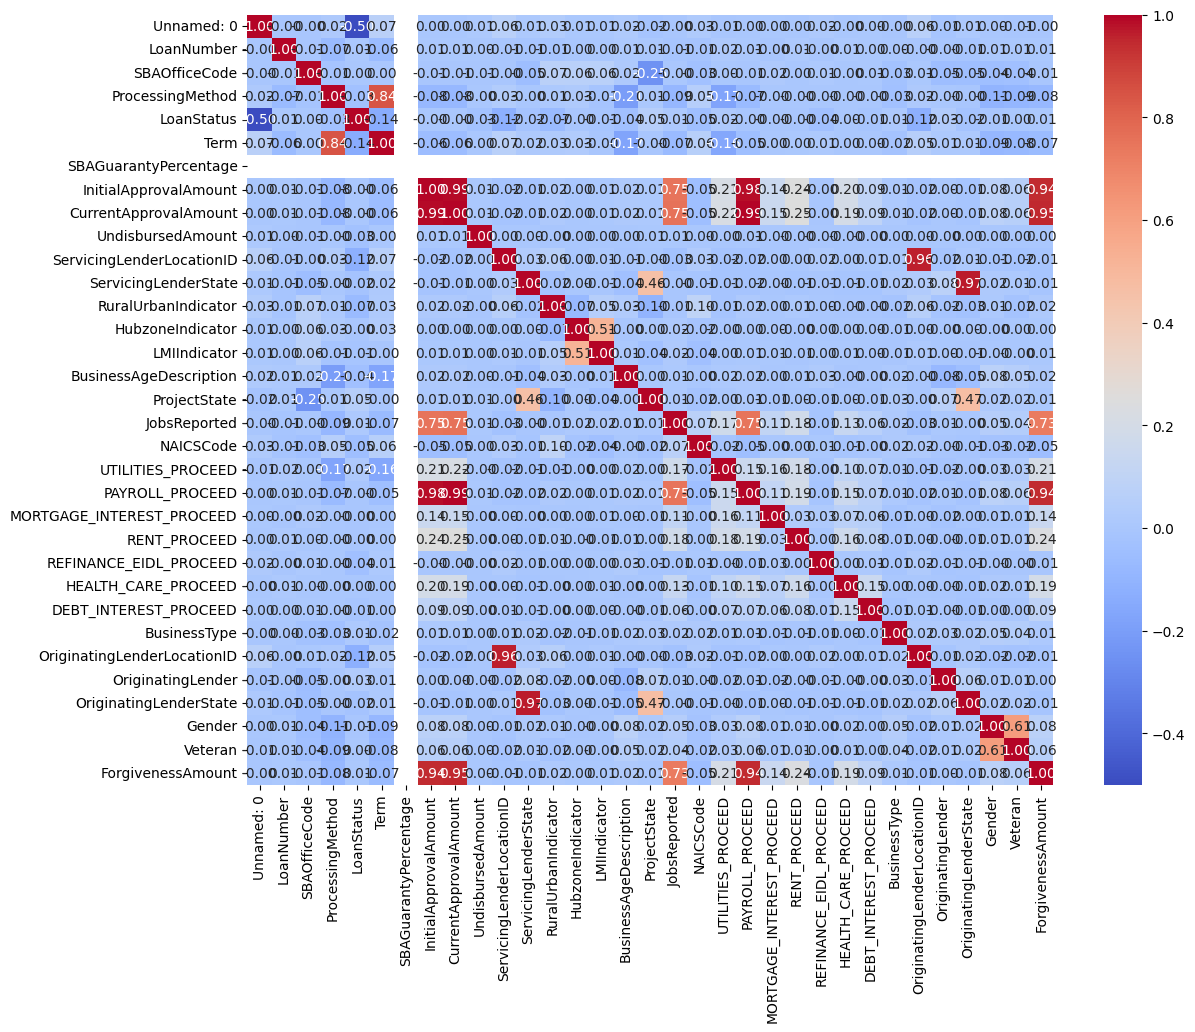

In [10]:
numeric_df = df.select_dtypes(include=['int64', 'float64','int32'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

correlation_matrix

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(13, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")

plt.show()

In [11]:
numeric_df = df.select_dtypes(include=['float64', 'int64','int32'])

# Include the target variable in the DataFrame
numeric_df['LoanStatus'] = df['LoanStatus']

# Calculate the correlation between the target variable and the numeric columns
correlation_with_target = numeric_df.corr()['LoanStatus']

# Display the correlation with the target variable
correlation_with_target

Unnamed: 0                    -0.500006
LoanNumber                     0.005581
SBAOfficeCode                  0.001943
ProcessingMethod              -0.032469
LoanStatus                     1.000000
Term                          -0.141032
SBAGuarantyPercentage               NaN
InitialApprovalAmount         -0.001096
CurrentApprovalAmount         -0.001895
UndisbursedAmount             -0.031117
ServicingLenderLocationID     -0.124744
ServicingLenderState          -0.024033
RuralUrbanIndicator           -0.070108
HubzoneIndicator              -0.004722
LMIIndicator                  -0.011714
BusinessAgeDescription        -0.042535
ProjectState                   0.051330
JobsReported                   0.011935
NAICSCode                     -0.047754
UTILITIES_PROCEED              0.016898
PAYROLL_PROCEED               -0.003009
MORTGAGE_INTEREST_PROCEED     -0.004565
RENT_PROCEED                  -0.002663
REFINANCE_EIDL_PROCEED        -0.041171
HEALTH_CARE_PROCEED            0.001230


In [12]:
columns_to_drop = correlation_with_target[(correlation_with_target > -0.008) & (correlation_with_target < 0.008)].index

# Step 3: Drop the identified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping the columns
df.head()


,Unnamed: 0,DateApproved,ProcessingMethod,BorrowerName,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,UndisbursedAmount,ServicingLenderLocationID,...,NAICSCode,UTILITIES_PROCEED,REFINANCE_EIDL_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderState,ForgivenessAmount,ForgivenessDate
0,157518,04/10/2020,0,PROFESSIONAL FLOORING CONTRACTORS LLC,04/16/2021,2,24,100,0.0,464999,...,238330.0,12439.210525,6188.123193,14226.465484,10,464999,427,10,253240.59,01/26/2021
1,96154,04/30/2020,0,CULP CONSTRUCTION COMPANY,03/18/2022,2,24,100,0.0,121536,...,236220.0,12439.210525,6188.123193,14226.465484,5,121536,967,40,436587.98,01/11/2021
2,79931,04/09/2020,0,KELLY WEARSTLER LLLP,09/21/2021,2,24,100,0.0,119918,...,541410.0,12439.210525,6188.123193,14226.465484,14,119918,1042,5,375128.61,08/26/2021
3,120564,04/16/2020,0,"RED RIVER LOGISTICS, LLC",01/22/2021,2,24,100,0.0,48270,...,488510.0,0.000000,0.000000,0.000000,5,48270,1919,37,256856.27,11/12/2020
4,181707,04/09/2020,0,GULL LAKE COUNTRY CLUB,11/17/2021,2,24,100,0.0,57328,...,713910.0,12439.210525,6188.123193,14226.465484,5,57328,3361,37,335600.14,02/03/2021


In [13]:
unnamed_columns = [col for col in df.columns if col.startswith('Unnamed')]

# Drop the unnamed columns from the DataFrame
df = df.drop(columns=unnamed_columns)

In [14]:
df.head()

,DateApproved,ProcessingMethod,BorrowerName,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,UndisbursedAmount,ServicingLenderLocationID,ServicingLenderName,...,NAICSCode,UTILITIES_PROCEED,REFINANCE_EIDL_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderState,ForgivenessAmount,ForgivenessDate
0,04/10/2020,0,PROFESSIONAL FLOORING CONTRACTORS LLC,04/16/2021,2,24,100,0.0,464999,"BankUnited, National Association",...,238330.0,12439.210525,6188.123193,14226.465484,10,464999,427,10,253240.59,01/26/2021
1,04/30/2020,0,CULP CONSTRUCTION COMPANY,03/18/2022,2,24,100,0.0,121536,Customers Bank,...,236220.0,12439.210525,6188.123193,14226.465484,5,121536,967,40,436587.98,01/11/2021
2,04/09/2020,0,KELLY WEARSTLER LLLP,09/21/2021,2,24,100,0.0,119918,East West Bank,...,541410.0,12439.210525,6188.123193,14226.465484,14,119918,1042,5,375128.61,08/26/2021
3,04/16/2020,0,"RED RIVER LOGISTICS, LLC",01/22/2021,2,24,100,0.0,48270,"JPMorgan Chase Bank, National Association",...,488510.0,0.000000,0.000000,0.000000,5,48270,1919,37,256856.27,11/12/2020
4,04/09/2020,0,GULL LAKE COUNTRY CLUB,11/17/2021,2,24,100,0.0,57328,The Huntington National Bank,...,713910.0,12439.210525,6188.123193,14226.465484,5,57328,3361,37,335600.14,02/03/2021


In [15]:
df.columns

Index(['DateApproved', 'ProcessingMethod', 'BorrowerName', 'LoanStatusDate',
       'LoanStatus', 'Term', 'SBAGuarantyPercentage', 'UndisbursedAmount',
       'ServicingLenderLocationID', 'ServicingLenderName',
       'ServicingLenderState', 'RuralUrbanIndicator', 'LMIIndicator',
       'BusinessAgeDescription', 'ProjectState', 'JobsReported', 'NAICSCode',
       'UTILITIES_PROCEED', 'REFINANCE_EIDL_PROCEED', 'DEBT_INTEREST_PROCEED',
       'BusinessType', 'OriginatingLenderLocationID', 'OriginatingLender',
       'OriginatingLenderState', 'ForgivenessAmount', 'ForgivenessDate'],
      dtype='object')

In [16]:
x = df[['ProcessingMethod','Term','SBAGuarantyPercentage','UndisbursedAmount','ServicingLenderLocationID','ServicingLenderState','RuralUrbanIndicator','LMIIndicator','BusinessAgeDescription','ProjectState','JobsReported','NAICSCode','UTILITIES_PROCEED','REFINANCE_EIDL_PROCEED','DEBT_INTEREST_PROCEED','BusinessType','OriginatingLenderLocationID','OriginatingLender','OriginatingLenderState','ForgivenessAmount']]
y = df['LoanStatus']

In [17]:
#LOGISTIC REGRESSION
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [19]:
lr.fit(x_train,y_train)


C:\Users\mehul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
predict = lr.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

C:\Users\mehul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.38      0.00      0.00      9792
           2       0.91      1.00      0.95     96814

    accuracy                           0.91    106609
   macro avg       0.43      0.33      0.32    106609
weighted avg       0.86      0.91      0.86    106609



C:\Users\mehul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mehul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
#RANDOM FOREST

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
# You can adjust the parameters as needed
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9784405373614808

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.95      0.81      0.87      5979
           2       0.98      1.00      0.99     58630

    accuracy                           0.98     64612
   macro avg       0.98      0.71      0.79     64612
weighted avg       0.98      0.98      0.98     64612


Confusion Matrix:
[[    1     2     0]
 [    0  4840  1139]
 [    0   252 58378]]


In [25]:
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.metrics import accuracy_score, classification_report

In [26]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.96


In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[    3     0     0]
 [    0  4813  1166]
 [    0  1348 57282]]


In [28]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.78      0.80      0.79      5979
           2       0.98      0.98      0.98     58630

    accuracy                           0.96     64612
   macro avg       0.92      0.93      0.92     64612
weighted avg       0.96      0.96      0.96     64612



In [29]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [30]:
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optionally, compute and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
[[    3     0     0]
 [ 1368    44  4567]
 [   91   120 58419]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         3
           1       0.27      0.01      0.01      5979
           2       0.93      1.00      0.96     58630

    accuracy                           0.90     64612
   macro avg       0.40      0.67      0.33     64612
weighted avg       0.87      0.90      0.87     64612

Accuracy: 0.90


In [32]:
import pickle

In [37]:
filename='file.pkl'
pickle.dump(clf,open(filename,'wb'))

In [38]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([2, 2, 2, ..., 2, 2, 2])